In [1]:
#importamos una libreria de limpieza de logs
from IPython.display import clear_output

In [2]:
#instalamos las librerias de Langchain y sql
!pip install langgraph langchain langchain_openai langchain_experimental
!pip install mysql-connector-python
clear_output()

In [3]:
#importamos las librerias
import os
from langchain_experimental.tools import PythonREPLTool
from langchain_community.agent_toolkits import SQLDatabaseToolkit
from langchain_community.utilities.sql_database import SQLDatabase
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain_openai import ChatOpenAI

In [5]:
## importamos los credenciales para la API de OPENAI y conexion de BD
with open("/content/api_key.txt") as archivo:
  apikey = archivo.read()
  os.environ["OPENAI_API_KEY"] =apikey #asignamos en la variable global la credencial

with open("/content/string_bd.txt") as archivo:
  uribd = archivo.readline()

In [6]:
#Creamos la conexion a la base de datos
db_data = SQLDatabase.from_uri(uribd)

In [7]:
# Herramienta Para ejecutar codigo Python
python_repl_tool = PythonREPLTool() #Cuidado este metodo puede ejecutar codigo python de manera indiscrminada
# Herramienta BD
toolkit_bd = SQLDatabaseToolkit(db=db_data,llm=ChatOpenAI(temperature=0))
tools_bd = toolkit_bd.get_tools()

In [8]:
#Creamos nuestro Toolkit con las herramientas anteriores
tools = [python_repl_tool] + tools_bd

In [9]:
## construimos el nucleo del prompt del agente en el cual indicamos su comportamiento
prompt_template = ChatPromptTemplate.from_messages([
    ("system",
     """
     Eres un sistema de consulta de base de datos y análisis de datos. Puedes ejecutar consultas SQL en la base de datos proporcionada para obtener datos reales y generar gráficos basados en esos datos.
     Utiliza la herramienta de Python para crear gráficos con Matplotlib."""
    ),
    MessagesPlaceholder("chat_history", optional=True),
    ("human", "{input}"),
    MessagesPlaceholder("agent_scratchpad"),
])

In [10]:
#inicializamos el modelo
llm = ChatOpenAI() #No es ncesario colocar las credenciales ya que se tiene en la variable global

In [11]:
#construimos el agente
agent = create_openai_tools_agent(llm, tools, prompt_template)

In [12]:
#Creamos el ejecutor y limitamos las interacciones
#para ver el comportamiento interno podemos agregar "verbose=True"
agent_executor = AgentExecutor(agent=agent, tools=tools, max_iterations=10)

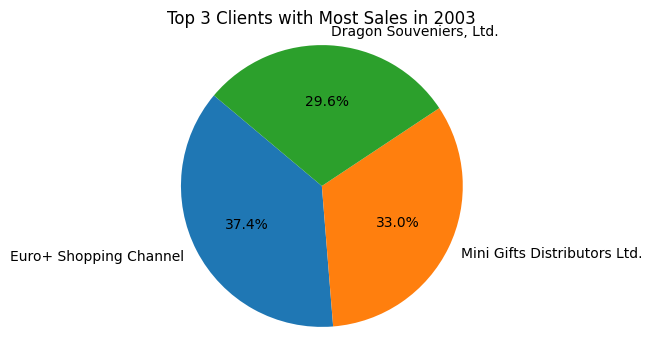

Se ha generado un gráfico de pastel que muestra el top 3 de clientes con más ventas en el año 2003 en tu base de datos. Puedes ver la distribución de ventas entre los clientes Euro+ Shopping Channel, Mini Gifts Distributors Ltd. y Dragon Souveniers, Ltd.


In [15]:
# Realizamos la consulta
#consulta = """
#Grafica un reporte en forma de torta del top 3 de cliente con mas ventas en el 2003 en mi base de datos
#"""

# Realizamos la consulta colocando un tamaño mas pequeño para mejorar la visibilidad
consulta = """
Grafica un reporte en forma de torta del top 3 de cliente con mas ventas en el 2003 en mi base de datos con tamaño 4
"""
#Realizamos la invocacion
result = agent_executor.invoke({"input": consulta})
print(result['output'])